## Introduction

YouTube is the most popular and most used video platfrom in the world today. YouTube has a list of trending videos that is updated constantly. Here we will use Python with some packages like Pandas and Matplotlib to analyze a dataset that was collected over 205 days. For each of those days, the dataset contains data about the trending videos of that day. It contains data about more than 40,000 trending videos. We will analyze this data to get insights into YouTube trending videos, to see what is common between these videos. Those insights might also be used by people who want to increase popularity of their videos on YouTube.


The dataset that we will use is obtained from Kaggle here. It contains data about trending videos for many countries. Here we will analyze USA trending videos.

## Description

In today's digital age, YouTube stands as the premier video platform, hosting a staggering amount of content catering to a global audience. YouTube's trending videos are at the forefront of its popularity, showcasing content that captures the attention of viewers worldwide. In our capstone project, we delve into the world of YouTube trending videos in India, using Python, Pandas, and Matplotlib to analyze a dataset collected over 205 days. This dataset contains valuable information on more than 37,000 trending videos, providing insights that can help content creators, marketers, and analysts understand the keys to YouTube success.

## Goal of this analysis

We want to answer questions like:
* How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?
* The same questions above, but applied to likes and comment count instead of views.
* Which video remained the most on the trendin-videos list?
* How many trending videos contain a fully-capitalized word in their titles?
* What are the lengths of trending video titles? Is this length related to the video becoming trendy?
* How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?
* What are the most common words in trending video titles?
* Which YouTube channels have the largest number of trending videos?
* Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?
* When were trending videos published? On which days of the week? at which times of the day?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
#  Importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and exploring Dataset

In [3]:
df = pd.read_csv('/kaggle/input/youtube-new/USvideos.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Data Description

* **Publish year** : 2018
* **Data fields** : The dataset includes attributes such as
  *   **Video_id** : A unique ID of the video.
  *   **trending_date** : Date when the video was on trending.
  *   **title** : Title of the video.
  *   **channel_title** : Name of the channel who uploade the video.
  *   **category_id** : A unique ID of category of which the video is. 
  *   **publish_time** : Time when the video is published.
  *   **tags** : Hashtags available in video.
  *   **views** : How many people watched the video. 
  *   **likes** : How many people liked the video.
  *   **dislikes** : How many people disliked the video.
  *   **comment_count** :  How many people commented on the video. 
  *   **thumbnail_link** : Link for the thumbnail of video.
  *   **comments_disabled** : If the comment section for the video is disabled or not.  
  *   **ratings_disabled** : If the ratings for the video is disabled or not.  
  *   **video_error_or_removed** : If the video is removed from the youtube \ showing an error or not.
  *   **description** : Description of the video.


## Data Cleaning

In [4]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

As there was 570 null values available in the description column so we are filling them with empty string.

In [5]:
df['description'] = df['description'].fillna("")

## 1. Basic Analysis

trending_year
2018    0.765562
2017    0.234438
Name: proportion, dtype: float64

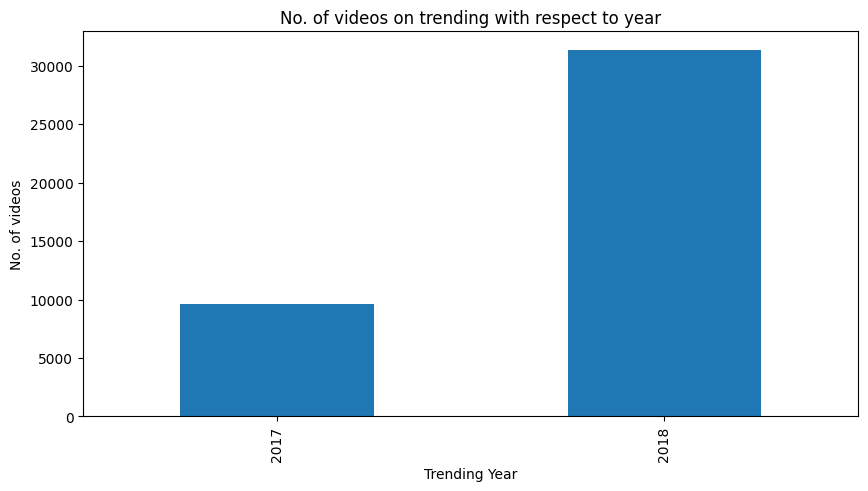

In [6]:
df['trending_year'] = df['trending_date'].apply(lambda x : '20'+x[:2])
plt.figure(figsize=(10,5))
df.groupby('trending_year')['video_id'].count().plot(kind='bar')
plt.title('No. of videos on trending with respect to year')
plt.xlabel('Trending Year')
plt.ylabel('No. of videos')
df['trending_year'].value_counts(normalize=True)

We can see the datset was collected in 2017 and 2018 with **77%** in 2018 and **23%** in 2017.

## 2. How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.6009426359618062

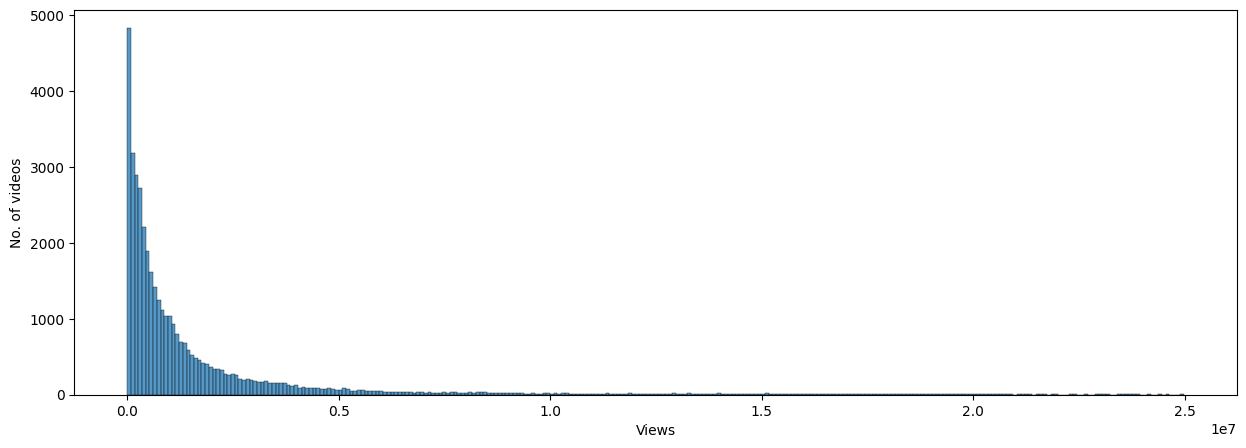

In [7]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['views']<25e6]['views'],kde=False)
plt.xlabel('Views')
plt.ylabel('No. of videos')
df[df['views']<1e6]['views'].count()/df['views'].count()

We can see that **60%** of the videos are below 1 million views

## 3. The same questions above, but applied to likes and comment count instead of views.

* **Plot for Likes**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.8391657915944223

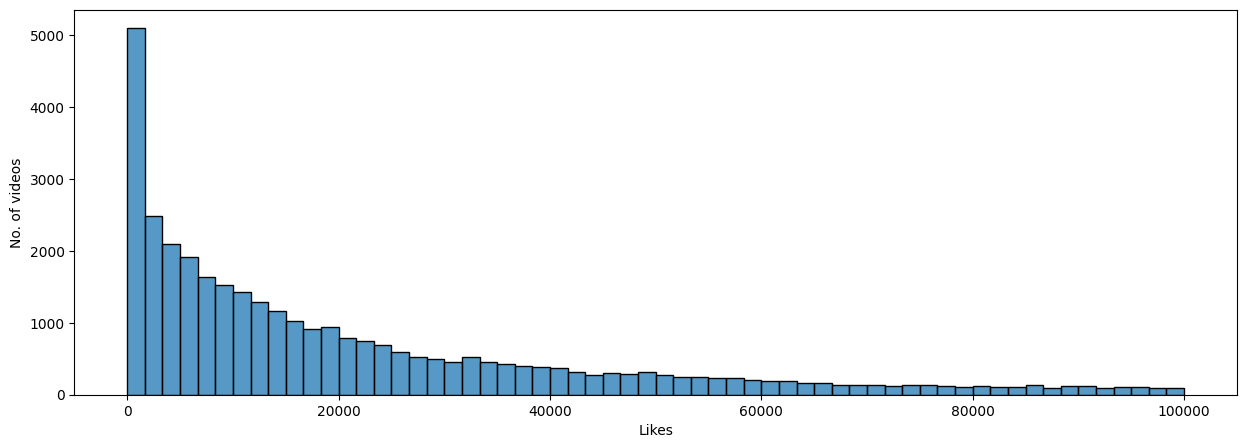

In [8]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['likes']<1e5]['likes'])
plt.xlabel('Likes')
plt.ylabel('No. of videos')
df[df['likes']<1e5]['likes'].count()/df['likes'].count()

We can see that **83%** of the videos have below 1 lakh likes

* **Plot for Comments**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.6842657940364844

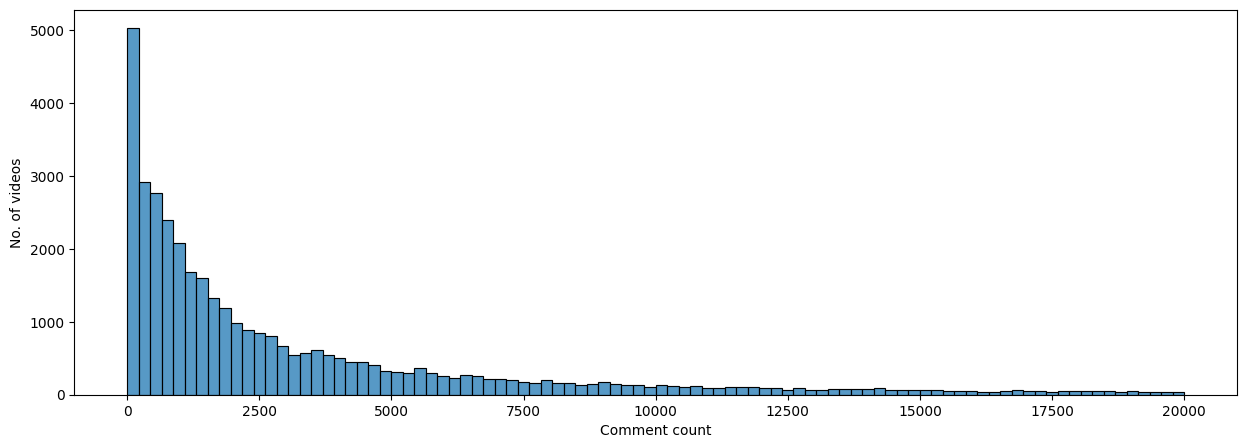

In [9]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['comment_count']<2e4]['comment_count'])
plt.xlabel('Comment count')
plt.ylabel('No. of videos')
df[df['comment_count']<4166]['comment_count'].count()/df['comment_count'].count()

We can see that **68%** of the videos have below 4166 Comments.

## 4. Analysis of object columns & The video which remained the most on the trendin-videos list

In [10]:
 df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,trending_year
count,40949,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902,2
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,,2018
freq,30,200,30,203,50,1535,30,570,31349


As per the above output
  * The dataset is on **205** unique dates.
  * It have **6351** unique videos out of **40949** rows which means some videos are one trending for more than one day.
  * Among all the videos **"WE MADE OUR MOM CRY...HER DREAM CAME TRUE!"** was on trending for **30** days having highest frequency.
  * **ESPN** channel have the most videos on trend.
  * We have **6902** unique description whereas we have **6351** unique videos which means some videos has its description changed.
  * We have **6269** unique Publish times which is less than unique videos which means some videos was published on same time.
  * Dataset have **6455** unique titles greater than the no of unique videos So below are list of videos which has its title changed.

In [11]:
c=df.groupby('video_id')['title'].nunique().sort_values(ascending=False).reset_index(name='No. of Unique titles')
list=c[c['No. of Unique titles']>1]['video_id'].unique()
df[df['video_id'].isin(list)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_year
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,2017
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,2017
272,ogYum4kWXgk,17.15.11,People Are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",155285,4719,64,207,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,2017
309,STI2fI7sKMo,17.15.11,WE GOOGLED OURSELVES | Shawn and Andrew,Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",346924,4657,1838,734,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,2017
490,ogYum4kWXgk,17.16.11,People Are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",174568,4934,65,208,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40561,XQSvN2Wd5MQ,18.13.06,International Dunkin Donuts Taste Test,Good Mythical Morning,24,2018-06-11T10:00:02.000Z,"gmm|""good mythical morning""|""rhettandlink""|""rh...",949521,27302,537,3341,https://i.ytimg.com/vi/XQSvN2Wd5MQ/default.jpg,False,False,False,Can we guess where in the world these Dunkin D...,2018
40651,2nVPFdqejD0,18.13.06,"Wait, My Crush is Watching? | Hannah Stocking ...",Hannah Stocking,23,2018-05-31T16:00:01.000Z,"wait my crush is watching|""hannah""|""stocking""|...",4378781,102608,23059,10023,https://i.ytimg.com/vi/2nVPFdqejD0/default.jpg,False,False,False,WATCH MORE ▶ https://youtu.be/2-tzlBFotjASUBSC...,2018
40745,H7gh2fmdjCU,18.13.06,Calum Scott - What I Miss Most (Official Video),CalumScottVEVO,10,2018-05-16T23:00:00.000Z,"Calum|""Scott""|""What""|""Miss""|""Most""|""Capitol""|""...",9912584,151941,1853,4716,https://i.ytimg.com/vi/H7gh2fmdjCU/default.jpg,False,False,False,Calum’s debut album ‘Only Human’ feat. “You Ar...,2018
40774,XQSvN2Wd5MQ,18.14.06,International Dunkin Donuts Taste Test,Good Mythical Morning,24,2018-06-11T10:00:02.000Z,"gmm|""good mythical morning""|""rhettandlink""|""rh...",1071182,29145,608,3598,https://i.ytimg.com/vi/XQSvN2Wd5MQ/default.jpg,False,False,False,Can we guess where in the world these Dunkin D...,2018


## 5. How many trending videos contain a fully-capitalized word in their titles?

In [12]:
def cap_title(s):
    for i in s.split():
        if i.isupper():
            return True
    return False
    
df['is title upper']=df['title'].apply(cap_title)
df[['title','is title upper']]
df['is title upper'].value_counts(normalize=True)

is title upper
False    0.560429
True     0.439571
Name: proportion, dtype: float64

As we can see only **43%** videos contains fully capitalized word in their title so this metric does not have any effect on trending list

## 6. What are the lengths of trending video titles? Is this length related to the video becoming trendy?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='title_length', ylabel='Count'>

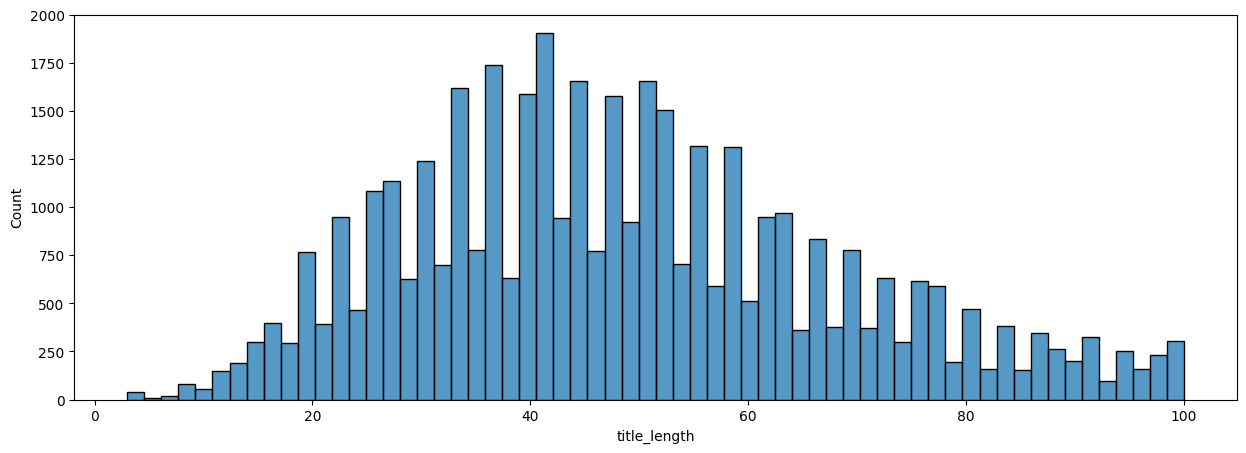

In [13]:
df['title_length'] = df['title'].apply(lambda x : len(x))
plt.figure(figsize=(15,5))
sns.histplot(df['title_length'])

Most of trendy videos have title length in between **30-60**

<Axes: xlabel='views', ylabel='title_length'>

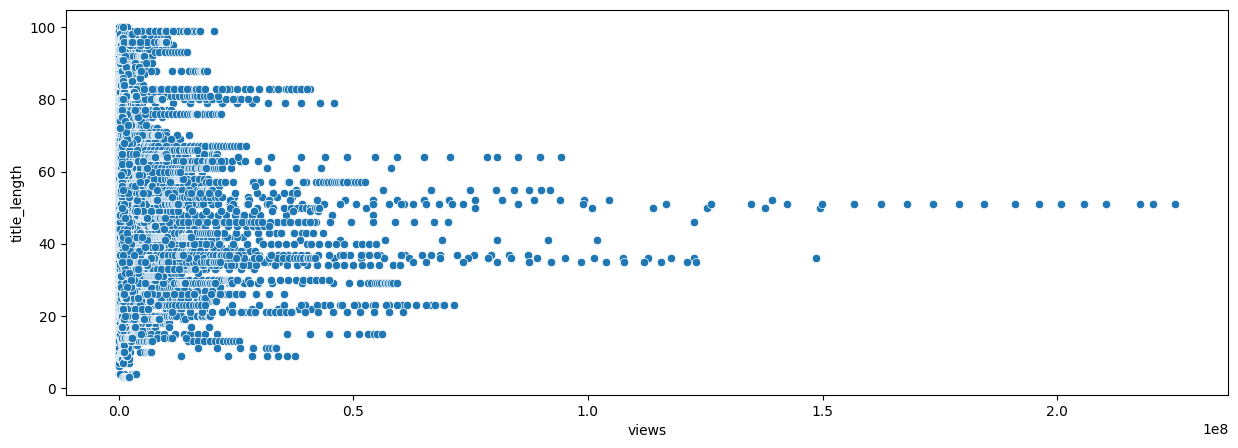

In [14]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['views'], y=df['title_length'])

Title length and views does not have any correlation. But it can be seen that title length between **35-65** have views more than 100 million

## 7. How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?

<Axes: >

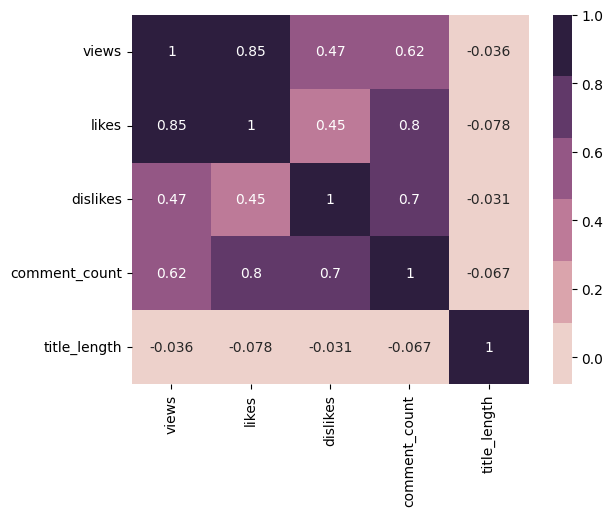

In [15]:
df.columns
sns.heatmap(df[ ['views', 'likes', 'dislikes', 'comment_count','title_length'] ].corr(),annot=True, cmap=sns.cubehelix_palette())

* Views and likes are Highly corelated with coeff of **0.85**.
* Likes and comment count have corr coeff of **0.8**.
* Dislikes and comment count have corr coeff of **0.7**.

<function matplotlib.pyplot.show(close=None, block=None)>

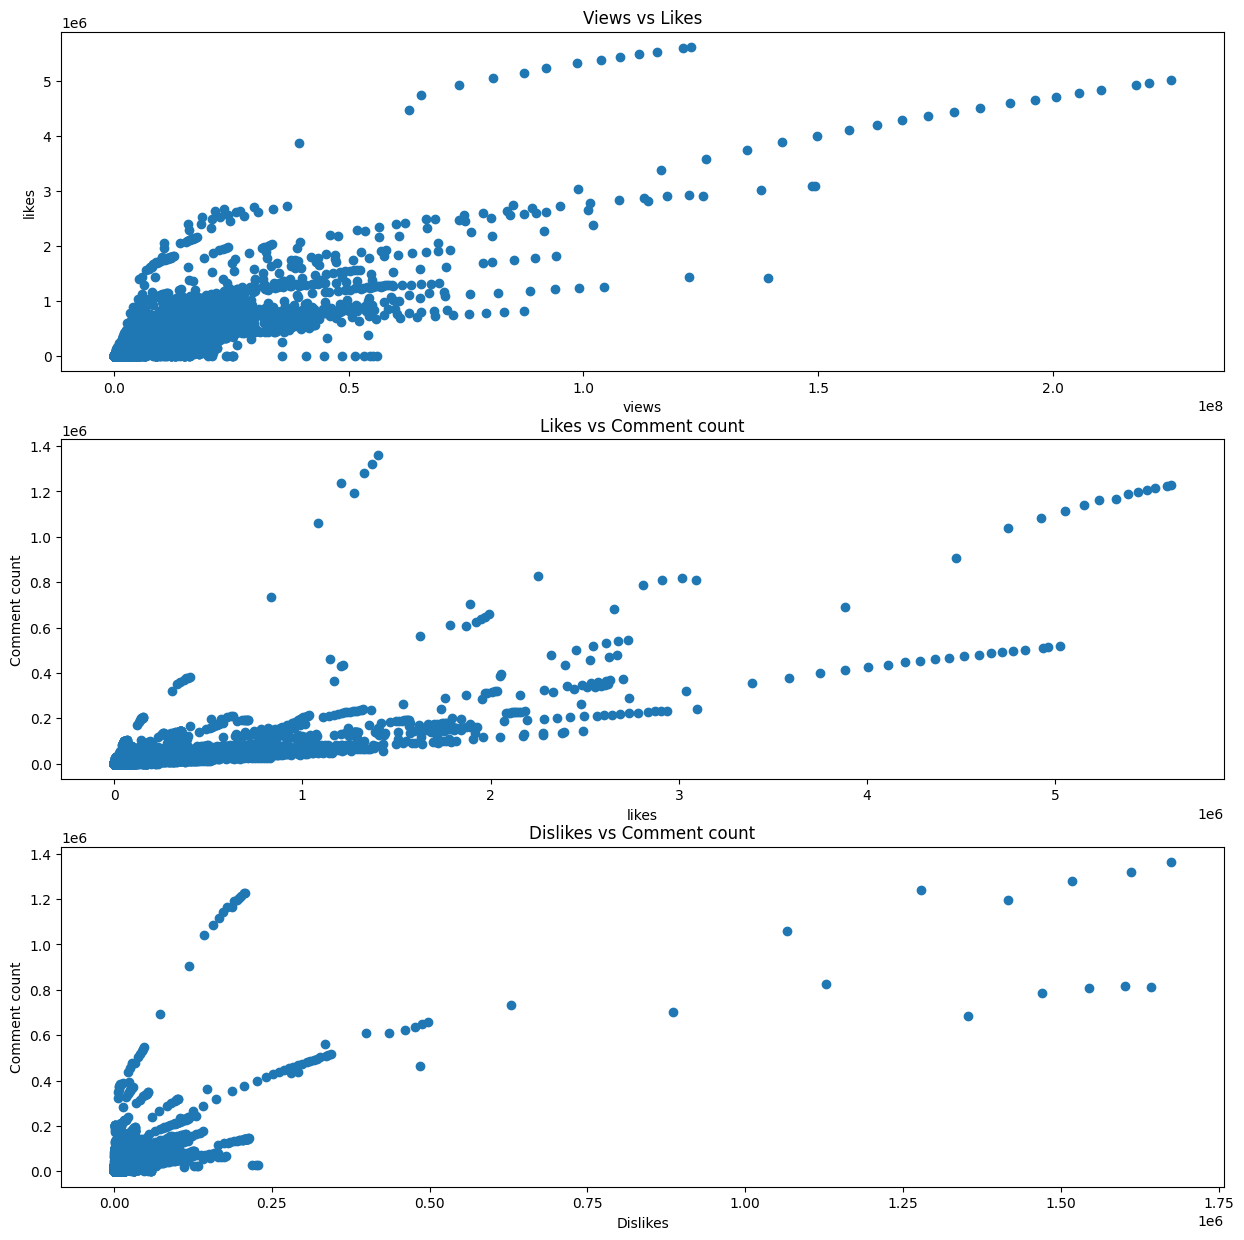

In [16]:
fig, axs = plt.subplots(3,1,figsize=(15,15))
axs[0].scatter(x=df['views'], y=df['likes'])
axs[1].scatter(x=df['likes'], y=df['comment_count'])
axs[2].scatter(x=df['dislikes'], y=df['comment_count'])
axs[0].set_title('Views vs Likes')
axs[1].set_title('Likes vs Comment count')
axs[2].set_title('Dislikes vs Comment count')
axs[0].set(xlabel=('views'), ylabel=('likes'))
axs[1].set(xlabel=('likes'), ylabel=('Comment count'))
axs[2].set(xlabel=('Dislikes'), ylabel=('Comment count'))
plt.show

## 8. What are the most common words in trending video titles?

In [17]:
title_words = df['title'].str.split()
title_words = [x for y in title_words for x in y]
from collections import Counter
Counter(title_words).most_common(30)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017),
 ('In', 943),
 ('With', 897),
 ('Is', 828),
 ('at', 826),
 ('What', 773)]

As we can see frm above output some of the most common keywords in video titles are **"video", "Trailer", "2018", "How", "Official"**.

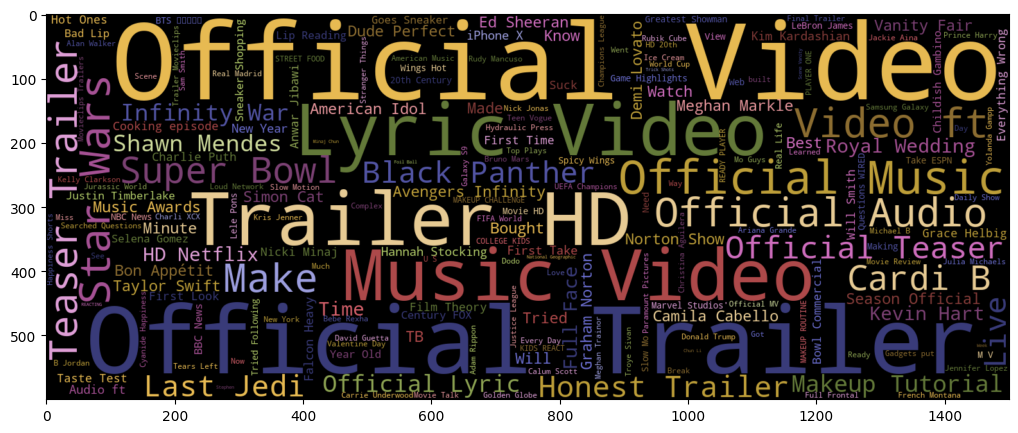

In [18]:
import wordcloud
wc= wordcloud.WordCloud(width=1500, height=600, collocations=True, background_color='Black', colormap='tab20b').generate(" ".join(title_words))
plt.figure(figsize=(15,5))
plt.imshow(wc,interpolation='bilinear')

## 9. Which YouTube channels have the largest number of trending videos?

<Axes: xlabel='channel_title'>

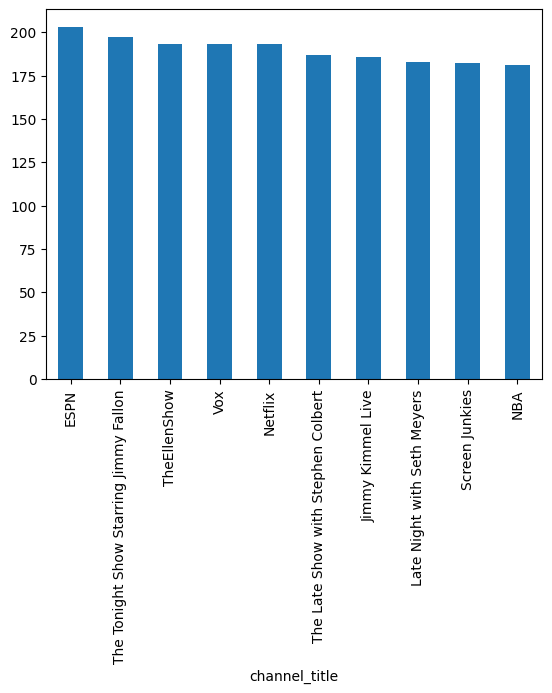

In [19]:
df['channel_title'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

**"ESPN"** channel have most number of trending videos.

## 10. Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos??

<Axes: xlabel='category_name'>

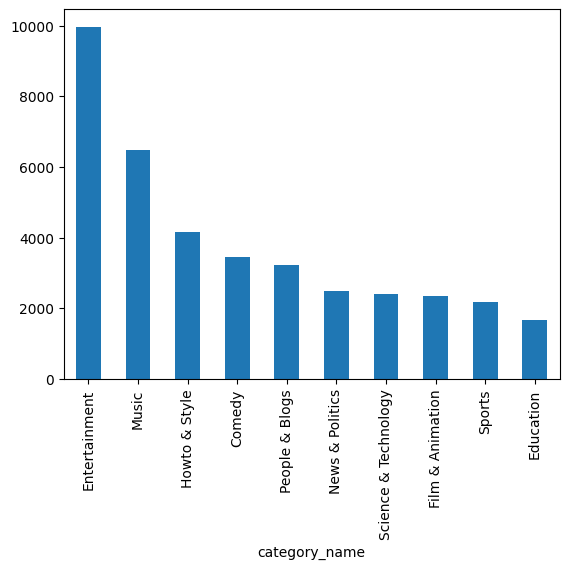

In [20]:
import json
with open('/kaggle/input/youtube-new/US_category_id.json') as f:
    categories = json.load(f)['items']
category_dict={}
for i in categories:
    category_dict[int(i['id'])]= i['snippet']['title']
df['category_name'] = df['category_id'].map(category_dict)
df.head()
df['category_name'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

Category **Entertainment** have the most no. of trending videos

## 11. When were trending videos published? On which days of the week? at which times of the day?

In [21]:
df['publish_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40949 entries, 0 to 40948
Series name: publish_time
Non-Null Count  Dtype 
--------------  ----- 
40949 non-null  object
dtypes: object(1)
memory usage: 320.0+ KB


<Axes: xlabel='publish_day', ylabel='no. of videos published'>

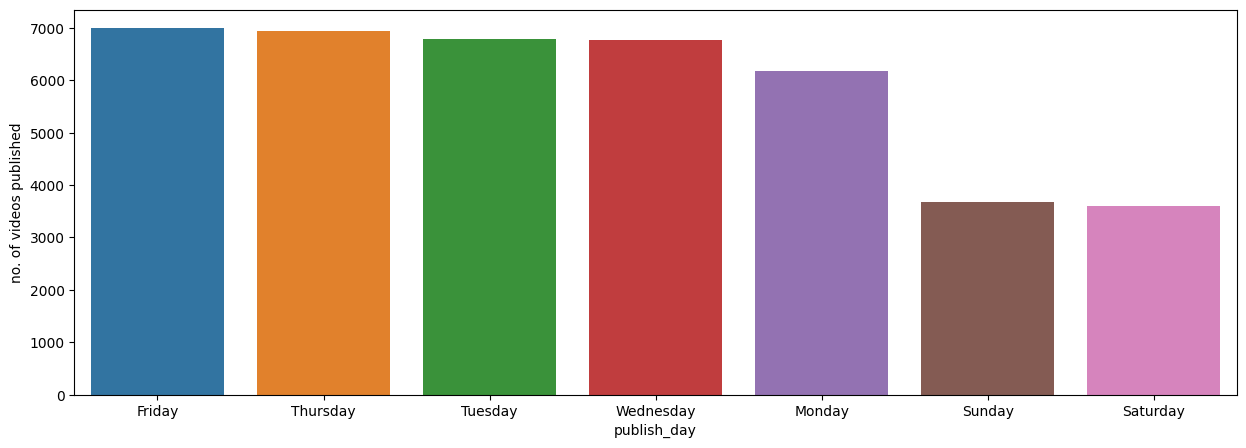

In [22]:
import datetime
df['publish_day'] = df['publish_time'].apply(lambda x : datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%A'))
pb_d = df['publish_day'].value_counts().reset_index(name='no. of videos published')
plt.figure(figsize=(15,5))
sns.barplot(x='publish_day', y='no. of videos published', data=pb_d)

<Axes: xlabel='publish_hr'>

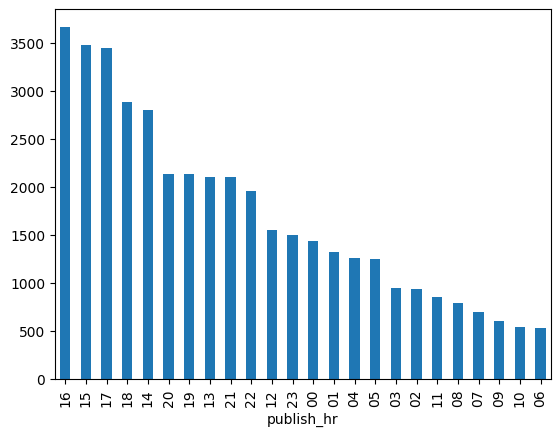

In [23]:
df['publish_hr'] = df['publish_time'].apply(lambda x : x[11:13])
df['publish_hr'].value_counts().plot(kind='bar')